In [1]:
%matplotlib inline
import networkx as nx
from collections import defaultdict
import glob
import io
import json

# Create a graph
graph = nx.DiGraph()
# Add a node
#graph.add_node('Elaine')
# Draw the graph
#nx.draw(graph, with_labels=True)

In [23]:
def get_users_mentions(DIR):
    
    mentions = defaultdict(set) # dictionary for keeping user mentioned as key and all mentions that he/she uses as value

    for file in glob.glob(DIR+"*.txt"):# loop for each file in the directory above
        with io.open(file,'r',encoding="utf-8") as mentioned:#open each file
            lines = mentioned.readlines() #read lines of the file
            for line in  lines: #loop for each line of the file
                tweets = json.loads(line) # loads each tweet as json
                if '@' in tweets['text']: # compare if the text of the tweet has a mention simbol
                        for part in tweets['text'].split(): #split the tweet's text and check where the mention is
                            if "@" in part:
                                try:#sometimes it was bugging, then I put a simple exception, not sure if is 100% correct.
                                    name = str(part) #changes the type of the split to string 
                                except:
                                    continue
                                name = name.translate(None, ";-+!?\"@#$%^&*()/\[]:")# takes out those characters from the mention
                mentions[tweets['user']['screen_name']].add(name)#keeps all mentions for each user
                
    return mentions
        

In [8]:
from collections import defaultdict
import glob
import io
import json

mentions = defaultdict(list) # dictionary for keeping user mentioned as key and all mentions that he/she uses as value

DIR='D:\\TCC\\Data\\mentions\\' # directory where data of the mentions is

for file in glob.glob(DIR+"*.txt"):# loop for each file in the directory above
    with io.open(file,'r',encoding="utf-8") as mentioned:#open each file
        lines = mentioned.readlines() #read lines of the file
        for line in  lines: #loop for each line of the file
            tweets = json.loads(line) # loads each tweet as json
            if '@' in tweets['text']: # compare if the text of the tweet has a mention symplo
                    #print tweet['text']
                    for part in tweets['text'].split():
                        if "@" in part:
                            #print part
                            try:
                                name = str(part)
                            except:
                                continue
                            name = name.translate(None, ";-+!?\"@#$%^&*()/\[]:")
            mentions[tweets['user']['screen_name']].append(name)
        

KeyboardInterrupt: 

In [24]:
DIR='D:\\TCC\\Data\\mentions\\' # directory where data of the mentions is
ments = get_users_mentions(DIR) 

In [18]:
teste = set([1,2,34,5,5546,3])
for t in teste:
    print t

1
2
3
5
5546
34


In [28]:
print len(ments)
#print ments
print type(ments)
mentions=None
#print set(ments['_MariaCosta_'])
for k,v in ments.items():
    print k
    for i in v:
        print i
    break

2795
<type 'collections.defaultdict'>
_MariaCosta_
_MariaCosta_
dorisvan_doria
aguedescartoon
mildignos
pralex10
Pontifex
infraton
claudiotognolli
YouTube
Nego_JJorge
FAXINANOPODER_
EpochTimesPT
RevistaEpoca
Dr___Evil
HanShotFirst69
FranciscoACruz
letraslimitadas
freire_roberto
Clauleao05
Digger_1612
DepEduardoCunha
edmilsonpapo10
SenadorCaiado
aeciofaraujo
DepEduardoCunha.
hieras1
coroneldoblog
starcraaft
ValleAmarildo
silva_jarbas
nivaldocordeiro
lobaoeletrico
teresinhalopes
HannahAluap
jwbranda
adrianohidalgo
DecioNeves
vagnercut
jnbragamonte
NaoKahlo
razev
UOL
DaniloGentili
STF_oficial
mvsmotta
CamaraDeputados
EstadaoPolitica
Zaga_Silos
uchoinfo
EuCobro
fresquenao
edgaarcia
Eliomiranda
SandraARomano
portalvox
OttoVonCifuder
LuauMhz
Pedrinhu_SPFC
diogomainardi
indignadosvene2
luciaguimaraes
thadeusimoes
psuvaristobulo
smallperes
jacksonrangel
Lize1906AnjoNpi
era1vez1
Ahgente99
AecioNeves.
Val_Ce1
edgaarciaGovernantes
GilCelidoniojr
FolhaPolitica
Ptralhasxyzw12341
foraptforadilma
Lua

In [42]:
DIR1='C:\\Users\\Elaine\\Desktop\\TCC\\all timeline\\'

past=[]
for file2 in glob.glob(DIR1+"*.txt"):#loop through each file of the directory above
        with io.open(file2,'r',encoding="utf-8") as f: #open each file
            print file2
            file_users = f.readlines()#read all lines of the file
            #file_mentions = fi.readlines()
            for line in file_users:#for each line in the file
                #print i
                tweet_users = json.loads(line)#loads the line as a json tweet
                user_name = tweet_users['user']['screen_name']#get the name of the main user
                
                for k,v in ments.items():#loop through the dictionary of mentioned users
                    #print 'tes'
                    #print a.replace('.txt', '')
                    #print v
                    if k in tweet_users['text']:# if the mentioned user name is mentioned in the text of the main user we have A -> B
                        #print k
                        for mention in v:# loop through all the mentions of the mentioned user
                            if mention == user_name and  (k,user_name) not in set(past):# if the main user is mentioned in the mentioned user mentions we create A -> B, B -> A
                                graph.add_edge(k,user_name)        
                                graph.add_edge(user_name,k)
                                print 'edge: ',k,user_name
                                past.append((k,user_name))
                                break  
                
        

C:\Users\Elaine\Desktop\TCC\all timeline\0686966667ff496.txt.txt
edge:  marisascruz 0686966667ff496
edge:  Ezequiasns 0686966667ff496
edge:  ottoni_3101 0686966667ff496
edge:  louisefabri 0686966667ff496
edge:  TO_DE_OLHO 0686966667ff496
edge:  nascimentoctba 0686966667ff496
edge:  mitags 0686966667ff496
edge:  motta1302 0686966667ff496
edge:  MaysaBentes 0686966667ff496
edge:  genaromagno 0686966667ff496
edge:  iabsilva2 0686966667ff496
edge:  nilzevictor 0686966667ff496
edge:  RodrigoLrocha2 0686966667ff496
edge:  tonny_coxa 0686966667ff496
edge:  lucmarsilva 0686966667ff496
edge:  tpimentelg 0686966667ff496
C:\Users\Elaine\Desktop\TCC\all timeline\66Viga.txt.txt
edge:  sraalvinegra 66Viga
edge:  JuntosComMatt 66Viga
edge:  didigomes_ 66Viga
edge:  Oconservador18 66Viga
edge:  WellKonkel 66Viga
edge:  BelCarvalho5 66Viga
edge:  menuci_fatima 66Viga
edge:  Jesa_nai 66Viga
C:\Users\Elaine\Desktop\TCC\all timeline\81Fabbinho.txt.txt
edge:  Stemberg 81Fabbinho
C:\Users\Elaine\Desktop\TCC

In [41]:
past

[(u'marisascruz', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'Ezequiasns', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'ottoni_3101', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'louisefabri', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'louisefabri', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'ottoni_3101', u'0686966667ff496'),
 (u'ottoni_3101', u'0686966667ff496'),
 (u'Ezequiasns', u'0686966667ff496'),
 (u'ottoni_3101', u'0686966667ff496'),
 (u'ottoni_3101', u'0686966667ff496'),
 (u'louisefabri', u'0686966667ff496'),
 (u'louisefabri', u'0686966667ff496'),
 (u'TO_DE_OLHO', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'TO_DE_OLHO', u'0686966667ff496'),
 (u'marisascruz', u'0686966667ff496'),
 (u'marisascruz', u'068696666

In [ ]:
import glob
import io, codecs,json

past=[]
DIR2='D:\\TCC\\Data\\mentions\\'
DIR1='C:\\Users\\Elaine\\Desktop\\TCC\\all timeline\\'
for _, _, arquivos1 in os.walk(DIR2): arquivos1
    
for file2 in glob.glob(DIR1+"*.txt"):
    #for file2 in glob.glob(DIR2+"*.txt"):
        with io.open(file2,'r',encoding="utf-8") as f:#, codecs.open(file2, 'r', encoding='utf-8') as fi:
            print file2
            file_users = f.readlines()
            #file_mentions = fi.readlines()
            for i in xrange(len(file_users)):
                #print i
                tweet_users = json.loads(file_users[i])
                user_name = tweet_users['user']['screen_name']
                #print 'user: ', user_name
                #print file2.replace('.txt.txt', '')
                for a in arquivos1:
                    #print 'tes'
                    #print a.replace('.txt', '')
                    if a.replace('.txt', '') in tweet_users['text']:
                        #print 'a: ', a
                        #print tweet_users['text']
                        mentions_file = codecs.open(DIR2+a,'r', encoding='utf-8')
                        read = mentions_file.readlines()
                        for k in xrange(len(read)):
                            try:
                                ttt = json.loads(read[k])
                            except:
                                continue
                            if (user_name in ttt['text']) and (ttt['user']['screen_name'] not in set(past)):
                                graph.add_edge(user_name,ttt['user']['screen_name'])        
                                graph.add_edge(ttt['user']['screen_name'],user_name)
                                print ttt['user']['screen_name'],user_name
                                past.append(ttt['user']['screen_name'])
                                break
                            
                
                        
                        
                        #edge1 = (user_name,file2.replace('.txt.txt', ''))
                    #print edge1
                    
        
    
"""for j in xrange(len(file_mentions)):
    tweet_mentions = json.loads(file_mentions)
    if user_name in tweet_mentions['text']:
        user_mentions = tweet_mentions['screen_name']
        break

    if user_mentions in tweet_users['text']:                 
        graph.add_edge(user_name,user_mentions)        
        graph.add_edge(user_mentions,user_name) """ 

C:\Users\Elaine\Desktop\TCC\all timeline\0686966667ff496.txt.txt
Dellacorte1311 0686966667ff496
marisascruz 0686966667ff496
SakaSakamori 0686966667ff496
taniaoliveira_

In [29]:
import os
test =[]
test2 = []
for _, _, arquivo1 in os.walk(DIR1): arquivo1
for _, _, arquivo2 in os.walk(DIR2): arquivo2
    

In [56]:
import re
arquivo22=[]
for t in arquivo2:
    t=t.replace('.txt.txt', '')
    arquivo22.append(t)
    
    

In [110]:
'Dellacorte1311' not in set(past)
print past

[u'Dellacorte1311', u'Dellacorte1311', u'marisascruz', u'Dellacorte1311', u'Dellacorte1311', u'marisascruz', u'marisascruz', u'marisascruz', u'SakaSakamori']


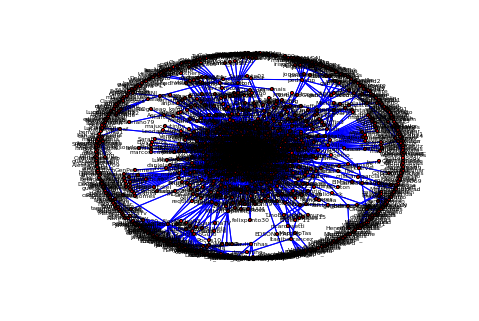

In [75]:
colors = range(20)
nx.draw(graph, with_labels=True, node_size=10, node_color='r', arrows=False,font_size=6, edge_color='b',width=1,edge_cmap='b')